In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/karma/Desktop/store-sales-time-series-forecasting/holidays_events.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [3]:
df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
df_train = pd.read_csv("/Users/karma/Desktop/store-sales-time-series-forecasting/train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
df_store = pd.read_csv("/Users/karma/Desktop/store-sales-time-series-forecasting/stores.csv")
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [6]:
#there is another column name type so I will delete this one because I want to merge them and simplify it.

df_store.drop(columns="type", inplace=True)
df_store.head()

,store_nbr,city,state,cluster
0,1,Quito,Pichincha,13
1,2,Quito,Pichincha,13
2,3,Quito,Pichincha,8
3,4,Quito,Pichincha,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,4


In [7]:
df_store_train = pd.merge(df_train, df_store, on="store_nbr", how="inner")
df_store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   cluster      int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 206.1+ MB


In [8]:
df_store_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
cluster        0
dtype: int64

In [9]:
final_merge = pd.merge(df_store_train, df, on="date", how="left")
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   cluster      int64  
 9   type         object 
 10  locale       object 
 11  locale_name  object 
 12  description  object 
 13  transferred  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 326.2+ MB


In [10]:
final_merge.tail()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,type,locale,locale_name,description,transferred
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [11]:
df_date_sales = final_merge[["date", "sales"]].copy()
df_date_sales.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


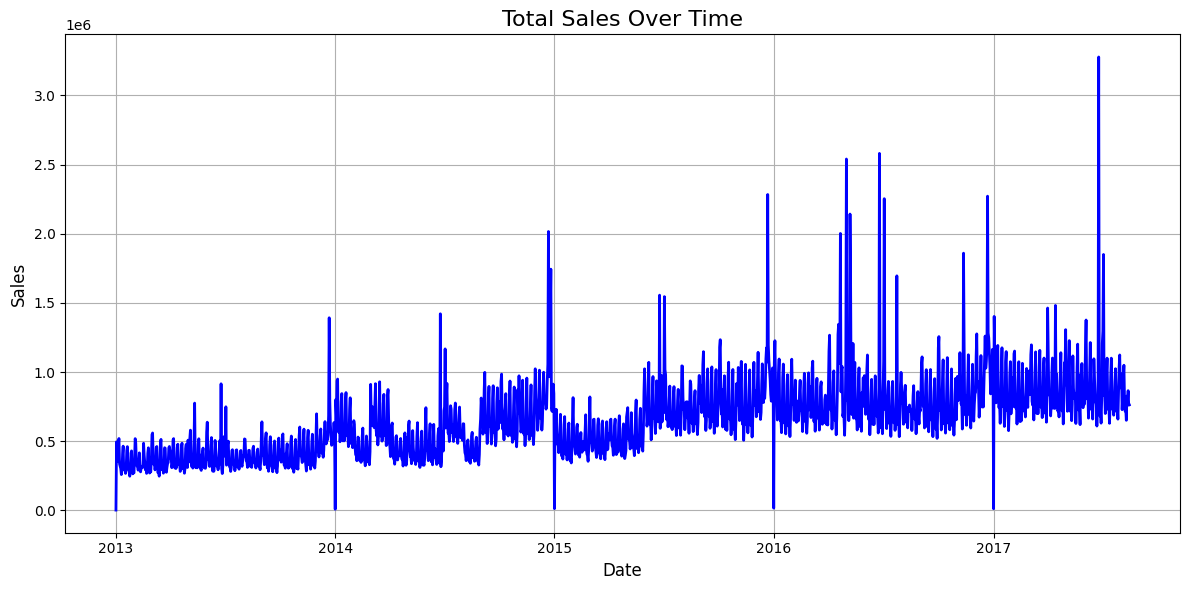

In [12]:
import matplotlib.pyplot as plt

# Ensure 'date' is datetime
df_date_sales["date"] = pd.to_datetime(df_date_sales["date"])

# Aggregate sales per day (optional, if multiple stores)
df_daily_sales = df_date_sales.groupby("date")["sales"].sum().reset_index()

# Create a line graph
plt.figure(figsize=(12,6))
plt.plot(df_daily_sales["date"], df_daily_sales["sales"], color="blue", linewidth=2)

plt.title("Total Sales Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


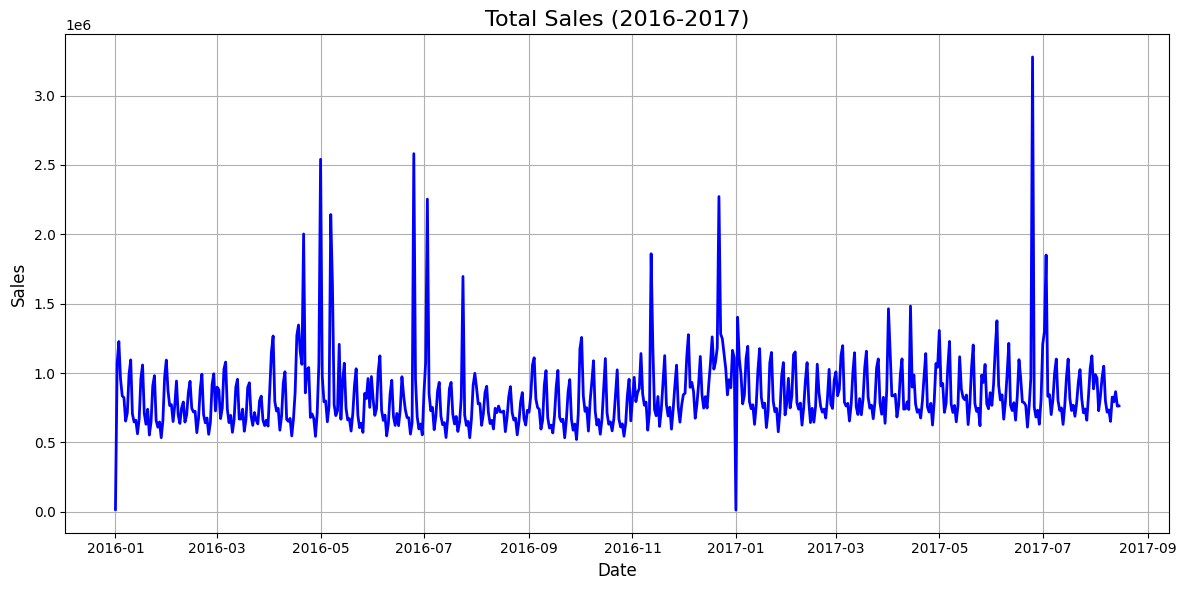

In [13]:
#The year 2016-2017 seems different from others, so lets focus on it.


# Filter for 2016-2017
mask = (df_date_sales["date"] >= "2016-01-01") & (df_date_sales["date"] <= "2017-12-31")
df_filtered = df_date_sales.loc[mask]

# Optional: aggregate sales per day
df_daily_sales = df_filtered.groupby("date")["sales"].sum().reset_index()

# Plot line graph
plt.figure(figsize=(12,6))
plt.plot(df_daily_sales["date"], df_daily_sales["sales"], color="blue", linewidth=2)
plt.title("Total Sales (2016-2017)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


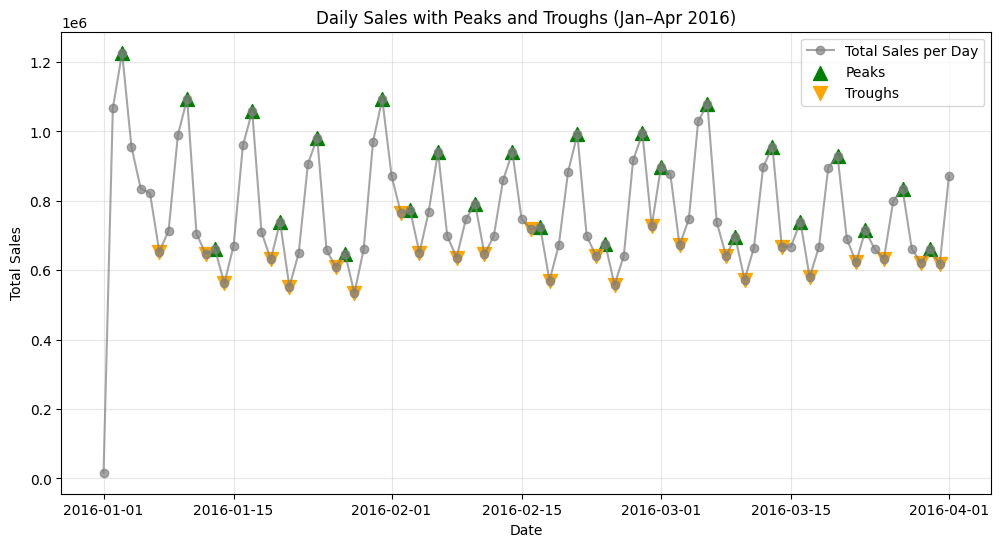

In [ ]:
# I want to check a regular cycle and determine the peak and trough per cycle, so that i can fine the avg. interval between each high and low sales.

from scipy.signal import find_peaks


# Aggregate: total sales per day
df_daily = df_date_sales.groupby("date", as_index=False)["sales"].sum()

# -----------------------------
# 2. Filter for date as desired
# -----------------------------
df_filtered = df_daily[
    (df_daily["date"] >= "2016-01-01") & 
    (df_daily["date"] <= "2016-04-01")
].reset_index(drop=True)

# -----------------------------
# 3. Find Peaks and Troughs
# -----------------------------
# Local maxima (peaks)
peaks, _ = find_peaks(df_filtered["sales"])

# Local minima (troughs → invert sales)
troughs, _ = find_peaks(-df_filtered["sales"])

# Extract results
peak_days = df_filtered.iloc[peaks][["date", "sales"]]
trough_days = df_filtered.iloc[troughs][["date", "sales"]]


#visualize
plt.figure(figsize=(12,6))
plt.plot(df_filtered["date"], df_filtered["sales"], 
         marker="o", color="gray", alpha=0.7, label="Total Sales per Day")

# Peaks → green triangles
plt.scatter(peak_days["date"], peak_days["sales"], 
            color="green", marker="^", s=100, label="Peaks")

# Troughs → orange inverted triangles
plt.scatter(trough_days["date"], trough_days["sales"], 
            color="orange", marker="v", s=100, label="Troughs")

plt.legend()
plt.title("Daily Sales with Peaks and Troughs (Jan–Apr 2016)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(alpha=0.3)
plt.show()


In [15]:
# Ensure peaks are sorted by date
peak_days = peak_days.sort_values("date").reset_index(drop=True)

# Calculate mean intervals between consecutive peaks
peak_days["days_between_peaks"] = peak_days["date"].diff().dt.days

mean_interval = peak_days["days_between_peaks"].mean()
print(f"Mean interval between consecutive peaks: {mean_interval:.2f} days")


Mean interval between consecutive peaks: 3.62 days


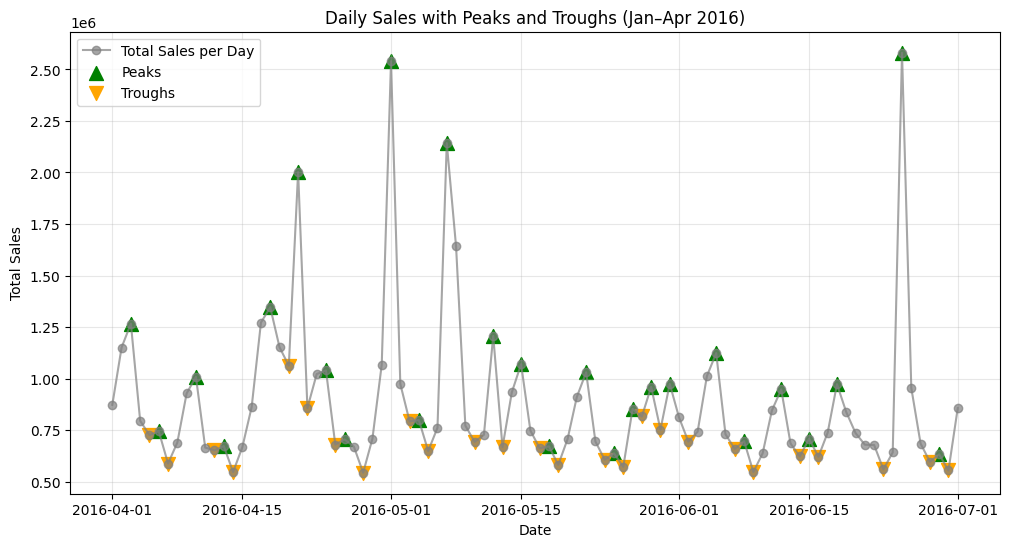

In [16]:
#now lets jump into a bit more irregular part of the sales.


# Aggregate: total sales per day
df_daily = df_date_sales.groupby("date", as_index=False)["sales"].sum()

# -----------------------------
# 2. Filter for Jan–Apr 2016
# -----------------------------
df_filtered = df_daily[
    (df_daily["date"] >= "2016-04-01") & 
    (df_daily["date"] <= "2016-07-01")
].reset_index(drop=True)

# -----------------------------
# 3. Find Peaks and Troughs
# -----------------------------
# Local maxima (peaks)
peaks, _ = find_peaks(df_filtered["sales"])

# Local minima (troughs → invert sales)
troughs, _ = find_peaks(-df_filtered["sales"])

# Extract results
peak_days = df_filtered.iloc[peaks][["date", "sales"]]
trough_days = df_filtered.iloc[troughs][["date", "sales"]]


# -----------------------------
# 5. Plot for visualization
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(df_filtered["date"], df_filtered["sales"], 
         marker="o", color="gray", alpha=0.7, label="Total Sales per Day")

# Peaks → green triangles
plt.scatter(peak_days["date"], peak_days["sales"], 
            color="green", marker="^", s=100, label="Peaks")

# Troughs → orange inverted triangles
plt.scatter(trough_days["date"], trough_days["sales"], 
            color="orange", marker="v", s=100, label="Troughs")

plt.legend()
plt.title("Daily Sales with Peaks and Troughs (Jan–Apr 2016)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(alpha=0.3)
plt.show()


In [17]:
# Ensure peaks are sorted by date
peak_days = peak_days.sort_values("date").reset_index(drop=True)

# Calculate mean intervals between consecutive peaks
peak_days["days_between_peaks"] = peak_days["date"].diff().dt.days

mean_interval = peak_days["days_between_peaks"].mean()
print(f"Mean interval between consecutive peaks: {mean_interval:.2f} days")


Mean interval between consecutive peaks: 3.48 days


In [18]:
#Therefore basically there isn't much difference in the interval, though the sales may vary.

In [ ]:

final_merge["date"] = pd.to_datetime(final_merge["date"])

# Filter for 2016
df_2016 = final_merge[final_merge["date"].dt.year == 2016]

# Find indices of top 20 sales
top20_indices = df_2016["sales"].nlargest(20).index

# Extract all information for these indices
top20_sales_info = df_2016.loc[top20_indices].reset_index(drop=True)

# Display
print("Top 20 sales rows in 2016 with all information:")
print(top20_sales_info)


Top 20 sales rows in 2016 with all information:
         id       date  store_nbr     family       sales  onpromotion  \
0   2163723 2016-05-02          2  GROCERY I  124717.000           59   
1   2445984 2016-10-07         39      MEATS   89576.360            0   
2   2144154 2016-04-21         20  GROCERY I   87438.516           53   
3   2144154 2016-04-21         20  GROCERY I   87438.516           53   
4   2139699 2016-04-18         45  GROCERY I   76090.000           38   
5   2153031 2016-04-26          2  GROCERY I   63434.000           30   
6   2145045 2016-04-21         45  GROCERY I   53874.000           44   
7   2145045 2016-04-21         45  GROCERY I   53874.000           44   
8   2276022 2016-07-04         20  GROCERY I   37514.926           40   
9   2550582 2016-12-05         24  GROCERY I   31689.000           98   
10  2563452 2016-12-12         35  GROCERY I   31125.521           77   
11  2137884 2016-04-17         44  GROCERY I   29670.000           36   
12 

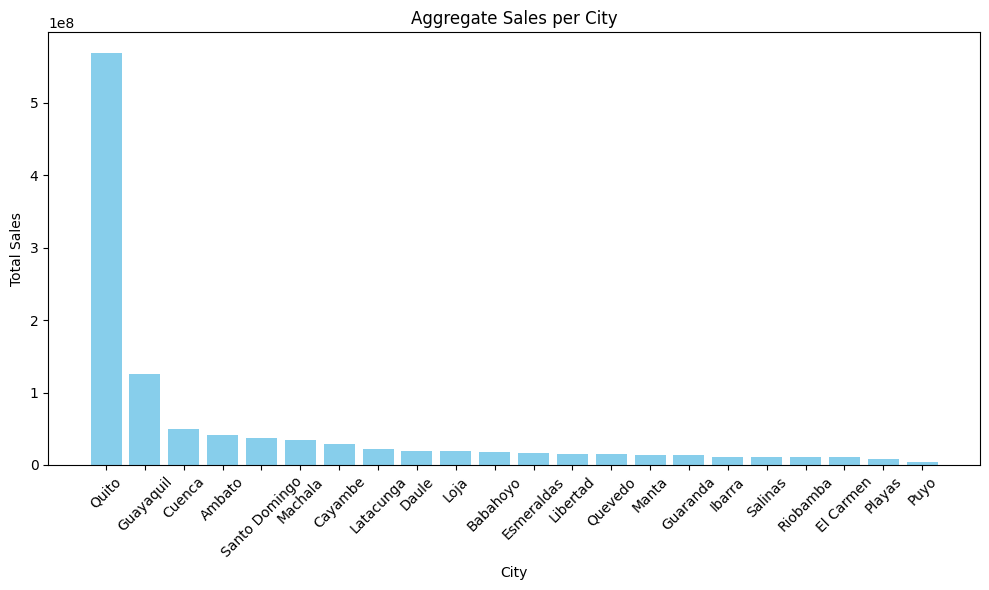

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure sales column is numeric
final_merge["sales"] = pd.to_numeric(final_merge["sales"], errors="coerce")

# Aggregate total sales per city
sales_per_city = final_merge.groupby("city", as_index=False)["sales"].sum()

# Sort by sales descending for better visualization
sales_per_city = sales_per_city.sort_values("sales", ascending=False)

# -----------------------------
# Plot the bar graph
# -----------------------------
plt.figure(figsize=(10,6))
plt.bar(sales_per_city["city"], sales_per_city["sales"], color="skyblue")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Aggregate Sales per City")
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.tight_layout()
plt.show()


Family with highest sales in Quito: GROCERY I with sales 170940521.284


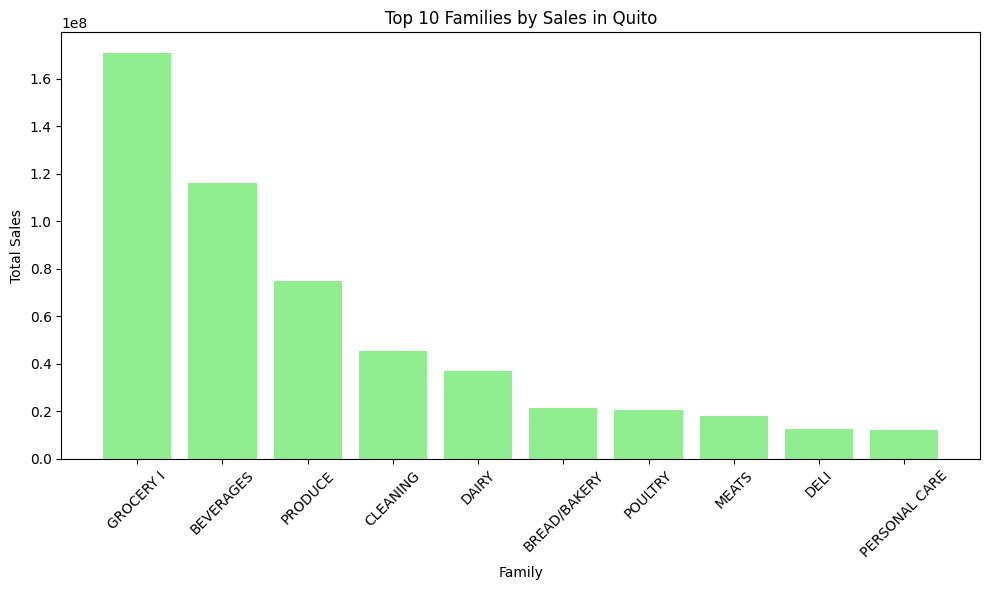

In [21]:
import matplotlib.pyplot as plt

# Filter for Quito
quito_data = final_merge[final_merge["city"] == "Quito"]

# Aggregate total sales per family
sales_per_family = quito_data.groupby("family", as_index=False)["sales"].sum()

# Sort by sales descending and take top 10
top10_family = sales_per_family.sort_values("sales", ascending=False).head(10)

# Display the family with most earning
top_family = top10_family.iloc[0]
print(f"Family with highest sales in Quito: {top_family['family']} with sales {top_family['sales']}")

# -----------------------------
# Plot the bar graph
# -----------------------------
plt.figure(figsize=(10,6))
plt.bar(top10_family["family"], top10_family["sales"], color="lightgreen")
plt.xlabel("Family")
plt.ylabel("Total Sales")
plt.title("Top 10 Families by Sales in Quito")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Family with highest sales in Quito: GROCERY I with sales 15995618.013


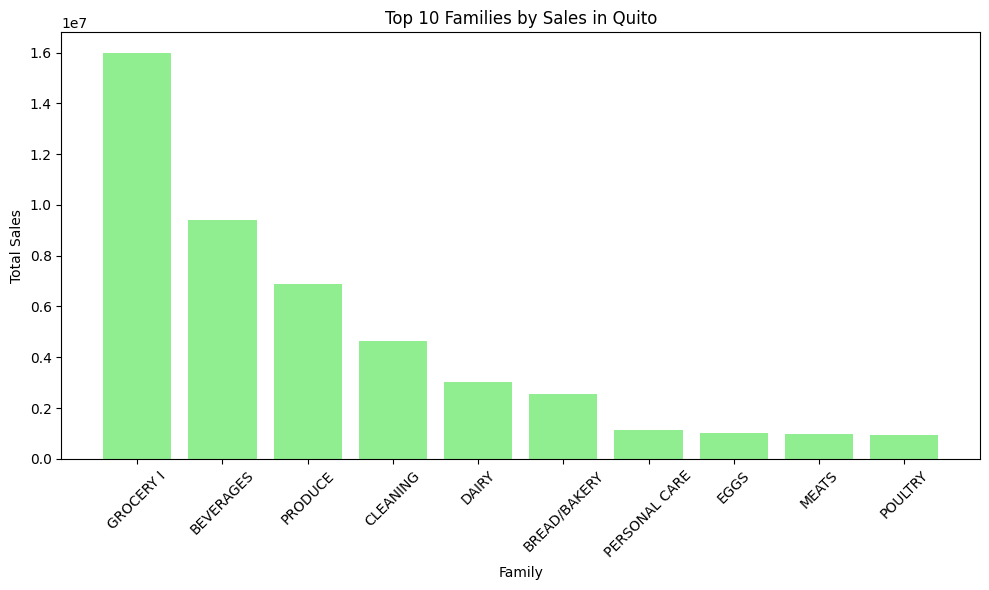

In [ ]:
# Filter for Quito
quito_data = final_merge[final_merge["city"] == "Cuenca"]

# Aggregate total sales per family
sales_per_family = quito_data.groupby("family", as_index=False)["sales"].sum()

# Sort by sales descending and take top 10
top10_family = sales_per_family.sort_values("sales", ascending=False).head(10)

# Display the family with most earning
top_family = top10_family.iloc[0]
print(f"Family with highest sales in Quito: {top_family['family']} with sales {top_family['sales']}")

# -----------------------------
# Plot the bar graph
# -----------------------------
plt.figure(figsize=(10,6))
plt.bar(top10_family["family"], top10_family["sales"], color="lightgreen")
plt.xlabel("Family")
plt.ylabel("Total Sales")
plt.title("Top 10 Families by Sales in Quito")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:


# Total sales across all cities
total_sales_all = final_merge["sales"].sum()

# Total sales of GROCERY I and BEVERAGES across all cities
selected_sales = final_merge[final_merge["family"].isin(["GROCERY I", "BEVERAGES"])]["sales"].sum()

# Calculate percentage
percentage = (selected_sales / total_sales_all) * 100

print(f"Total sales of GROCERY I + BEVERAGES: {selected_sales}")
print(f"Total sales across all cities: {total_sales_all}")
print(f"Percentage contribution of GROCERY I + BEVERAGES: {percentage:.2f}%")


Total sales of GROCERY I + BEVERAGES: 572490837.99
Total sales across all cities: 1096574744.2062502
Percentage contribution of GROCERY I + BEVERAGES: 52.21%


In [24]:
final_merge.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False


In [25]:
#Transferred column makes my analysis a bit complicate, I will see how many True values are present and decide to keep it remove it.
final_merge["transferred"].value_counts(dropna=False)

transferred
NaN      2551824
False     486486
True       16038
Name: count, dtype: int64

In [26]:
final_merge["type"].value_counts(dropna=False)

type
NaN           2551824
Holiday        304722
Event           99792
Additional      67716
Transfer        16038
Work Day         8910
Bridge           5346
Name: count, dtype: int64

In [27]:
day_off_categories = ["Holiday", "Event", "Additional", "Bridge"]

final_merge["day_off"] = final_merge["type"].isin(day_off_categories)


In [28]:
final_merge.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,type,locale,locale_name,description,transferred,day_off
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False,True
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False,True
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False,True
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,13,Holiday,National,Ecuador,Primer dia del ano,False,True


In [29]:
df = final_merge.copy()

In [30]:
df.drop(columns=["store_nbr", "family", "city", "state", "cluster", "type", "locale", "locale_name", "description", "transferred"], inplace=True)

In [31]:
df.head()

,id,date,sales,onpromotion,day_off
0,0,2013-01-01,0.0,0,True
1,1,2013-01-01,0.0,0,True
2,2,2013-01-01,0.0,0,True
3,3,2013-01-01,0.0,0,True
4,4,2013-01-01,0.0,0,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   sales        float64       
 3   onpromotion  int64         
 4   day_off      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 96.1 MB


In [33]:
df.isnull().sum()

id             0
date           0
sales          0
onpromotion    0
day_off        0
dtype: int64

In [34]:
df = df.drop(columns=["id"])
df


,date,sales,onpromotion,day_off
0,2013-01-01,0.000,0,True
1,2013-01-01,0.000,0,True
2,2013-01-01,0.000,0,True
3,2013-01-01,0.000,0,True
4,2013-01-01,0.000,0,True
...,...,...,...,...
3054343,2017-08-15,438.133,0,True
3054344,2017-08-15,154.553,1,True
3054345,2017-08-15,2419.729,148,True
3054346,2017-08-15,121.000,8,True


In [35]:
# Aggregate sales and onpromotion by date
daily_data = df.groupby("date").agg({
    "sales": "sum",
    "onpromotion": "sum",
    "day_off": "max"  # True if any row that day is a day off
}).reset_index()

# Optional: check the result
daily_data.head()


,date,sales,onpromotion,day_off
0,2013-01-01,2511.618999,0,True
1,2013-01-02,496092.417944,0,False
2,2013-01-03,361461.231124,0,False
3,2013-01-04,354459.677093,0,False
4,2013-01-05,477350.121229,0,False


In [36]:
import pandas as pd

# Make sure date is datetime
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Set date as index
daily_data = daily_data.set_index('date').sort_index()

# Use sales as the series
sales_ts = daily_data['sales']


In [37]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(sales_ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

if adf_result[1] < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")


ADF Statistic: -2.9316458403999306
p-value: 0.041789840054319904
Critical Values: {'1%': -3.4342954463097706, '5%': -2.8632826898390484, '10%': -2.5676977663666714}
The series is likely stationary.


In [38]:
#Therefore, the series is stationary but the average peak and trough interval is present so it is seasonal. Therefore, we use SARIMA instead of ARIMA.
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Non-seasonal ARIMA terms
p, d, q = 3, 1, 3

# Seasonal ARIMA terms
P, D, Q, s = 1, 0, 2, 4 # s=3 for 3-day seasonality


In [49]:
model = SARIMAX(sales_ts,
                order=(p,d,q),
                seasonal_order=(P,D,Q,s),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()
# Extract optimized coefficients
optimized_params = model_fit.params
print(optimized_params)


/Users/karma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/karma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.35154D+01    |proj g|=  4.89588D-01

At iterate    5    f=  1.34841D+01    |proj g|=  9.74067D-02

At iterate   10    f=  1.34628D+01    |proj g|=  1.03417D-01

At iterate   15    f=  1.34496D+01    |proj g|=  1.56919D-01

At iterate   20    f=  1.34397D+01    |proj g|=  1.99576D-01

At iterate   25    f=  1.34288D+01    |proj g|=  8.36627D-02

At iterate   30    f=  1.34072D+01    |proj g|=  1.95414D-01

At iterate   35    f=  1.33992D+01    |proj g|=  1.67591D-01

At iterate   40    f=  1.33983D+01    |proj g|=  5.18044D-02

At iterate   45    f=  1.33955D+01    |proj g|=  1.72118D-01

At iterate   50    f=  1.33954D+01    |proj g|=  2.71115D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/karma/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


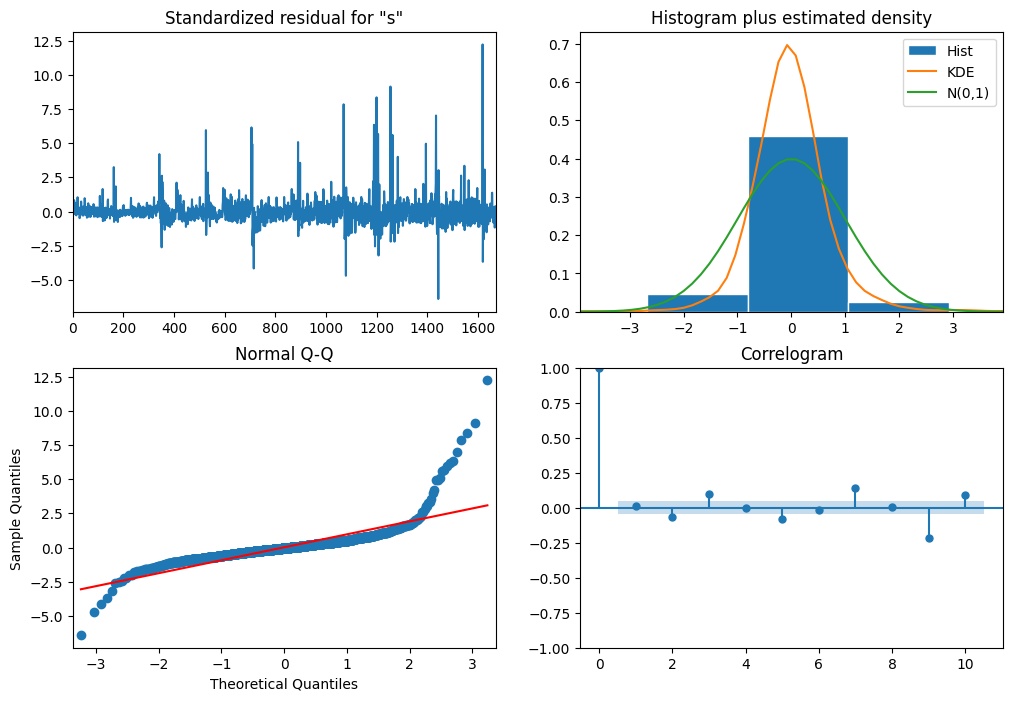

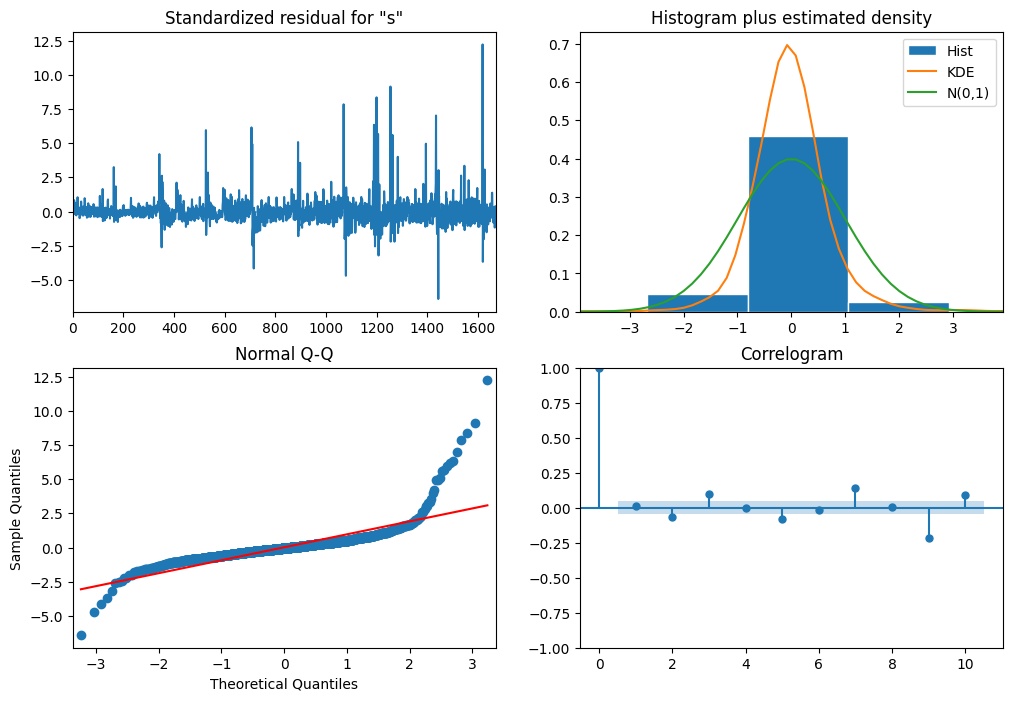

In [50]:
model_fit.plot_diagnostics(figsize=(12,8))



In [55]:
#The graphs show good results as expected. Standardized residual is random, histogram is centered at 0, most points lie on 45 degree line and finally most of the lags are within the confidence bar.


/Users/karma/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


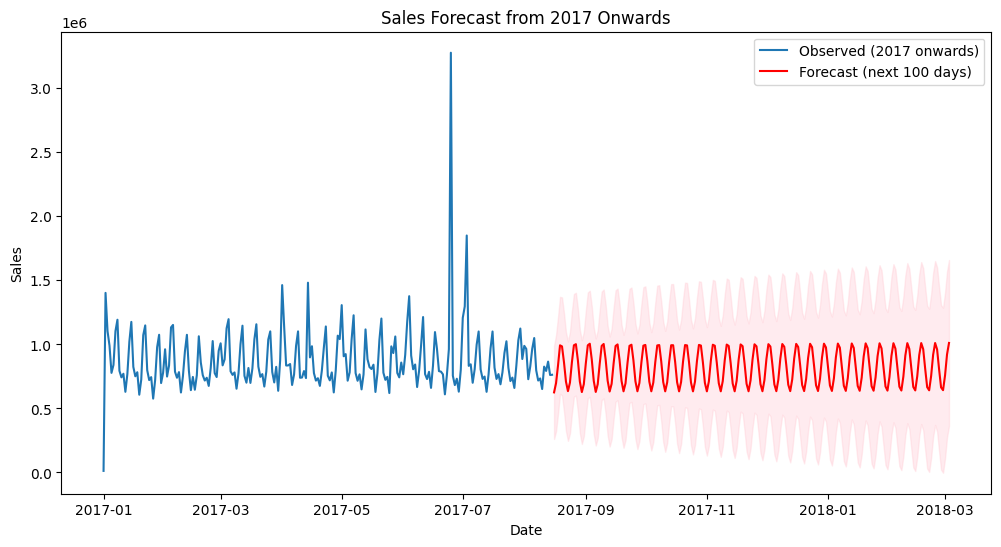

In [52]:
# Forecast next 100 days
forecast_steps = 200
forecast = model_fit.get_forecast(steps=forecast_steps)

# Fix the index to continue from last date
forecast_index = pd.date_range(start=sales_ts.index[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq='D')

forecast_mean = pd.Series(forecast.predicted_mean.values, index=forecast_index)
conf_int = forecast.conf_int()
conf_int.index = forecast_index

# Filter historical data from 2017 onwards for visualization
sales_2017_onwards = sales_ts[sales_ts.index >= '2017-01-01']

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_2017_onwards, label='Observed (2017 onwards)')
plt.plot(forecast_mean, label='Forecast (next 100 days)', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('Sales Forecast from 2017 Onwards')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [61]:
import pmdarima as pm

auto_model = pm.auto_arima(sales_ts,
                           seasonal=True,
                           m=4,          # seasonal period
                           stepwise=True,
                           trace=True)
print(auto_model.summary())


/Users/karma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: F

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=45745.122, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=46452.722, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=46317.371, Time=0.10 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=45930.229, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=46450.728, Time=0.02 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=45770.533, Time=0.88 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=45769.166, Time=0.81 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[4] intercept   : AIC=45705.282, Time=1.97 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[4] intercept   : AIC=45710.701, Time=0.99 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=inf, Time=3.61 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=45676.185, Time=1.97 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[4] intercept   : AIC=45696.770, Time=1.74 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[4] intercept   : AIC=45681.476, Time=1.35 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[4] intercept   : AIC=45733.041, Time=1.66 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[4] intercept   : AIC=45677.016, Time=1.55 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,2)[4] intercept   : AIC=45496.135, Time=4.30 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,2)[4] intercept   : AIC=45501.960, Time=4.42 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[4] intercept   : AIC=45507.584, Time=2.47 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,2)[4] intercept   : AIC=45512.885, Time=4.46 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,1)[4] intercept   : AIC=45506.370, Time=2.29 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,1)[4] intercept   : AIC=45501.843, Time=3.35 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,2)[4] intercept   : AIC=45677.649, Time=3.31 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,2)[4] intercept   : AIC=45473.315, Time=4.37 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,2)[4] intercept   : AIC=45480.724, Time=4.08 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[4] intercept   : AIC=45505.615, Time=3.02 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,2)[4] intercept   : AIC=45487.241, Time=4.77 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,1)[4] intercept   : AIC=45493.133, Time=2.48 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,1)[4] intercept   : AIC=45487.089, Time=3.33 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,2)[4]             : AIC=45471.835, Time=4.42 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,2)[4]             : AIC=45484.167, Time=3.76 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,1)[4]             : AIC=45496.903, Time=2.97 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,2)[4]             : AIC=45476.254, Time=4.98 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,1)[4]             : AIC=45481.150, Time=2.34 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,1)[4]             : AIC=45484.819, Time=3.69 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,2)[4]             : AIC=45499.208, Time=3.86 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[4]             : AIC=45675.669, Time=1.49 sec


/Users/karma/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[4]             : AIC=45673.528, Time=1.96 sec

Best model:  ARIMA(3,1,3)(1,0,2)[4]          
Total fit time: 94.337 seconds
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 1684
Model:             SARIMAX(3, 1, 3)x(1, 0, [1, 2], 4)   Log Likelihood              -22725.918
Date:                                Fri, 22 Aug 2025   AIC                          45471.835
Time:                                        16:09:07   BIC                          45526.119
Sample:                                             0   HQIC                         45491.941
                                               - 1684                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------

In [54]:
#Though I was able to get the forecast, it was not as good because the algo studied only the patterns to forecast whereas, there are multiple features to consider. 
#Therefore, I will use nn to forecast.